In [0]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145577&authkey=ADhTTaP_EXHvX0s"

--2019-05-05 17:19:15--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145577&authkey=ADhTTaP_EXHvX0s
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://lgr3dw.am.files.1drv.com/y4mZ9Uq7BMdkIaYtlrUM0qn3tF9kN6Mv1lk1Y4KjpZte0pchHU4uulbYxqof3CohMdifQj7aNKOCSjKWC_Wm4LhUwsSnk-jqU41y_jB9-CUaY996vintiywudNx783vTvqPx-VRC-2jBHbwmexYti6vmuj2O1Aw7hRopgQzVcYcrF-E4-22CZC-l3wCXSSUi-AK0fsLEPbGCPKAZAWFuW7O3g/UFPR04.zip?download&psid=1 [following]
--2019-05-05 17:19:16--  https://lgr3dw.am.files.1drv.com/y4mZ9Uq7BMdkIaYtlrUM0qn3tF9kN6Mv1lk1Y4KjpZte0pchHU4uulbYxqof3CohMdifQj7aNKOCSjKWC_Wm4LhUwsSnk-jqU41y_jB9-CUaY996vintiywudNx783vTvqPx-VRC-2jBHbwmexYti6vmuj2O1Aw7hRopgQzVcYcrF-E4-22CZC-l3wCXSSUi-AK0fsLEPbGCPKAZAWFuW7O3g/UFPR04.zip?download&psid=1
Resolving lgr3dw.am.files.1drv.com (lgr3dw.am.files.1drv.com)..

In [0]:
!info "download?cid=11F71A1654195330&resid=11F71A1654195330!45577&authkey=ADhTTaP_EXHvX0s"
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45577&authkey=ADhTTaP_EXHvX0s"

/bin/bash: info: command not found


In [0]:
import numpy as np
import tensorflow as tf
from keras import models
from keras import layers
import os


data_dir = './UFPR04'
base_train_dir = os.path.join(data_dir, 'train')
base_test_dir = os.path.join(data_dir, 'test')


# Das CNN
# Das Model arbeitet sequentiell
# Aktivierungsfunktion kann ersetzt werden
# Die Anzahl der Neuronen der Layer kann verändert werden
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(40, 80, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten()) # "Abflachen" der Layer zu 1D
model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
# Auswahl der Loss-Function und des Optimizers
# binary_crossentropy muss bestehen bleiben, da binäres Problem
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 78, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 39, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 37, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 18, 16)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                36880     
_________________________________________________________________
dens

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   shear_range=0.3,
                                   zoom_range=0.3,
                                   fill_mode='nearest'
                                  )


test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        base_train_dir,
        target_size=(40, 80),
        batch_size=500,
        class_mode='binary'
        )

validation_generator = test_datagen.flow_from_directory(
        base_test_dir,
        target_size=(40, 80),
        batch_size=200,
        class_mode='binary'
        )

Found 81256 images belonging to 2 classes.
Found 22266 images belonging to 2 classes.


In [0]:
from keras. callbacks import EarlyStopping

es = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit_generator(
                              train_generator,
                              steps_per_epoch=162, 
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=111, 
                              callbacks=[es], 
                             )

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
162/162 [==============================] - 131s 806ms/step - loss: 0.2501 - acc: 0.8971 - val_loss: 0.1641 - val_acc: 0.9545
Epoch 2/100
162/162 [==============================] - 117s 721ms/step - loss: 0.1140 - acc: 0.9586 - val_loss: 0.1005 - val_acc: 0.9712
Epoch 3/100
162/162 [==============================] - 119s 736ms/step - loss: 0.0843 - acc: 0.9707 - val_loss: 0.0524 - val_acc: 0.9825
Epoch 4/100
162/162 [==============================] - 118s 729ms/step - loss: 0.0767 - acc: 0.9728 - val_loss: 0.0550 - val_acc: 0.9830
Epoch 5/100
162/162 [==============================] - 118s 729ms/step - loss: 0.0629 - acc: 0.9780 - val_loss: 0.0743 - val_acc: 0.9792
Epoch 6/100
162/162 [==============================] - 118s 728ms/step - loss: 0.0607 - acc: 0.9791 - val_loss: 0.0720 - val_acc: 0.9811
Epoch 7/100
162/162 [==============================] - 117s 722ms/step - loss: 0.0525 - acc: 0.9818 - val_loss: 0.0303 - val_acc: 

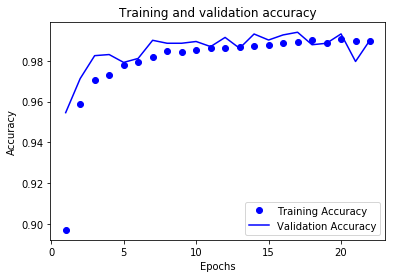

In [0]:
# Grafische (Verlaufs-)Darstellung des Loss

%matplotlib inline  
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" = Blauer Punkt
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
# "b" = Blaue Linie
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [7]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU"

--2019-05-05 19:31:21--  https://onedrive.live.com/download?cid=11F71A1654195330&resid=11F71A1654195330%2145681&authkey=AIicdVtkBEkQgvU
Resolving onedrive.live.com (onedrive.live.com)... 13.107.42.13
Connecting to onedrive.live.com (onedrive.live.com)|13.107.42.13|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mwrg1q.am.files.1drv.com/y4mZ2BwmxI9vShK0aX3W5GBOd9RhJCSj8Hd23H4D6ymb_T9hO2q5hSGgkcD9LiIVL2ezXvP2WQPGm1J-fnjggwEselr9sGm14fZbe1uCWZBj0tHmAXEc-Flyt1spFrZ9JPLFi0Kg0VRL24mbfKLqZoFlH_NOpjS087-geE1QJA660wkVRfTyErVfsWtoQF3jjuAze6l4-VMLU-38SLBeODv2Q/CNR_TEST.zip?download&psid=1 [following]
--2019-05-05 19:31:22--  https://mwrg1q.am.files.1drv.com/y4mZ2BwmxI9vShK0aX3W5GBOd9RhJCSj8Hd23H4D6ymb_T9hO2q5hSGgkcD9LiIVL2ezXvP2WQPGm1J-fnjggwEselr9sGm14fZbe1uCWZBj0tHmAXEc-Flyt1spFrZ9JPLFi0Kg0VRL24mbfKLqZoFlH_NOpjS087-geE1QJA660wkVRfTyErVfsWtoQF3jjuAze6l4-VMLU-38SLBeODv2Q/CNR_TEST.zip?download&psid=1
Resolving mwrg1q.am.files.1drv.com (mwrg1q.am.files.1drv.co

In [0]:
!unzip -q "download?cid=11F71A1654195330&resid=11F71A1654195330!45681&authkey=AIicdVtkBEkQgvU"

In [15]:
temp = os.path.join("./CNR", 'test')


test_generator = test_datagen.flow_from_directory(
        temp,
        target_size=(40, 80),
        batch_size=128,
        class_mode='binary'
        )


model.evaluate_generator(test_generator,20)

Found 144965 images belonging to 2 classes.


[0.6182978987693787, 0.826953125]